## Importing the data

In [536]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


In [537]:
friends_df = pd.read_csv('../data/friends_info.csv')
friends_df.head(10)

,Date,Episode,Title,Directed by,Written by,Duration,Summary,Rating/Share,U.S. viewers,Prod. code
0,09/22/94,01-01,The Pilot,James Burrows,David Crane & Marta Kauffman,22.0,"Monica and the gang introduce Rachel to the ""r...",14.7/23,21.5 million,456650
1,09/29/94,01-02,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,22.0,Ross finds out his ex-wife is pregnant. Rachel...,14.0/22,20.2 million,456652
2,10/06/94,01-03,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,22.0,Monica becomes irritated when everyone likes h...,13.6/22,19.5 million,456651
3,10/13/94,01-04,The One with George Stephanopoulos,James Burrows,Alexa Junge,22.0,Joey and Chandler take Ross to a hockey game t...,13.7/22,19.7 million,456654
4,10/20/94,01-05,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,22.0,"Eager to spend time with Rachel, Ross pretends...",12.9/20,18.6 million,456653
5,10/27/94,01-06,The One with the Butt,Arlene Sanford,Adam Chase & Ira Ungerleider,22.0,Monica's obsessiveness is put to the test afte...,12.4/20,18.2 million,456655
6,11/03/94,01-07,The One with the Blackout,James Burrows,Jeffrey Astrof & Mike Sikowitz,22.0,"When New York suffers from a blackout, Ross tr...",16.1/24,23.5 million,456656
7,11/10/94,01-08,The One Where Nana Dies Twice,James Burrows,Marta Kauffman & David Crane,22.0,Monica and Ross mourn the loss of their grandm...,14.2/22,21.1 million,456657
8,11/17/94,01-09,The One Where Underdog Gets Away,James Burrows,Jeff Greenstein & Jeff Strauss,22.0,The gang's plans for Thanksgiving go awry afte...,15.7/24,23.1 million,456659
9,12/15/94,01-10,The One with the Monkey,Peter Bonerz,Adam Chase & Ira Ungerleider,22.0,The gang make (and break) a pact not to bring ...,13.6/22,19.9 million,456661


## Explore data

In [538]:
friends_df.shape

(229, 10)

In [539]:
friends_df.isna().sum()

Date            0
Episode         0
Title           0
Directed by     2
Written by      2
Duration        2
Summary         2
Rating/Share    0
U.S. viewers    0
Prod. code      2
dtype: int64

In [540]:
friends_null = friends_df[friends_df.isna().any(axis=1)]
friends_null

,Date,Episode,Title,Directed by,Written by,Duration,Summary,Rating/Share,U.S. viewers,Prod. code
156,02/15/01,Special,Friends: The Stuff You've Never Seen,NaN,NaN,NaN,NaN,14.4/21,22.50 million,NaN
227,05/06/04,Special,The One Before the Last One:\r\nTen Years of F...,NaN,NaN,NaN,NaN,22.0/35,36.89 million,NaN


In [541]:
friends_special = friends_df[friends_df['Episode'] == 'Special']
friends_special


,Date,Episode,Title,Directed by,Written by,Duration,Summary,Rating/Share,U.S. viewers,Prod. code
156,02/15/01,Special,Friends: The Stuff You've Never Seen,NaN,NaN,NaN,NaN,14.4/21,22.50 million,NaN
227,05/06/04,Special,The One Before the Last One:\r\nTen Years of F...,NaN,NaN,NaN,NaN,22.0/35,36.89 million,NaN


In [542]:
friends_df.dtypes

Date             object
Episode          object
Title            object
Directed by      object
Written by       object
Duration        float64
Summary          object
Rating/Share     object
U.S. viewers     object
Prod. code       object
dtype: object

## Cleaning and transforming the data

### Drop unnecessary columns

In [543]:
friends_df.drop(columns=['Prod. code'], inplace=True)
friends_df.columns

Index(['Date', 'Episode', 'Title', 'Directed by', 'Written by', 'Duration',
       'Summary', 'Rating/Share', 'U.S. viewers'],
      dtype='object')

### Drop 2 special episodes because of missing values

In [544]:
friends_df.drop(friends_df[friends_df['Episode'] == 'Special'].index.values, axis=0, inplace=True)
friends_df.isna().sum()

Date            0
Episode         0
Title           0
Directed by     0
Written by      0
Duration        0
Summary         0
Rating/Share    0
U.S. viewers    0
dtype: int64

### Cleaning column values

In [545]:
bad_values = friends_df['Episode'].str.contains('\n')
print('Number of rows with two episodes: {}'.format(
    len(friends_df[bad_values])))

Number of rows with two episodes: 9


In [546]:
friends_df[bad_values]

,Date,Episode,Title,Directed by,Written by,Duration,Summary,Rating/Share,U.S. viewers
35,01/28/96,02-12\r\n02-13,The One After the Super Bowl,Michael Lembeck,Jeffrey Astrof & Mike SikowitzMichael Borkow,44.0,Ross goes to visit Marcel whilst on a trip to ...,29.6/46,52.9 million
94,05/07/98,04-23\r\n04-24,The One with Ross's Wedding,Kevin S. Bright,Michael BorkowStory by : Jill Condon & Amy Too...,60.0,Phoebe tries to help Rachel deal with her feel...,21.2/35,31.6 million
117,05/20/99,05-23\r\n05-24,The One in Vegas,Kevin S. Bright,Ted Cohen & Andrew ReichGregory S. Malins & Sc...,44.0,The gang go to Las Vegas to visit Joey. Chandl...,17.0/29,25.9 million
132,02/17/00,06-15\r\n06-16,The One That Could Have Been,Michael Lembeck,Gregory S. Malins & Adam ChaseDavid Crane & Ma...,60.0,When Rachel hears Barry and Mindy are getting ...,16.7/26,20.7 million
140,05/18/00,06-24\r\n06-25,The One with the Proposal,Kevin S. Bright,Shana Goldberg-Meehan & Scott SilveriAndrew Re...,60.0,Chandler's plan to propose to Monica at dinner...,20.0/32,30.7 million
164,05/17/01,07-23\r\n07-24,The One with Monica and Chandler's Wedding,Kevin S. Bright,Gregory S. MalinsMarta Kauffman & David Crane,44.0,"So close to the wedding, Chandler suddenly rea...",18.7/31,30.05 million
187,05/16/02,08-23\r\n08-24,The One Where Rachel Has a Baby,Kevin S. Bright,Scott SilveriMarta Kauffman & David Crane,44.0,Ross and Rachel go to the hospital to have the...,21.1/34,34.91 million
210,05/15/03,09-23\r\n09-24,The One in Barbados,Kevin S. Bright,Shana Goldberg-Meehan & Scott SilveriMarta Kau...,44.0,"Chandler gives advice to David, but that makes...",16.0/26,25.46 million
228,05/06/04,10-17\r\n10-18,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,60.0,Erica gives birth to the baby that Monica and ...,29.8/43,52.46 million


### Episodes with 2 parts are contained on one row only
We found out that the 7 missing episodes are not actually missing, they are a part of episodes with 2 parts.

#### Create a new column called "2 Parts"
A value of 1 means the episode has 2 parts, 0 if not.

In [547]:
def isTwoPart(row):
    if '\n' in row['Episode']:
        return 1
    else:
        return 0

friends_df['2 Parts'] = friends_df.apply(lambda row: isTwoPart(row), axis=1)
friends_df[friends_df['2 Parts'] == 1]


,Date,Episode,Title,Directed by,Written by,Duration,Summary,Rating/Share,U.S. viewers,2 Parts
35,01/28/96,02-12\r\n02-13,The One After the Super Bowl,Michael Lembeck,Jeffrey Astrof & Mike SikowitzMichael Borkow,44.0,Ross goes to visit Marcel whilst on a trip to ...,29.6/46,52.9 million,1
94,05/07/98,04-23\r\n04-24,The One with Ross's Wedding,Kevin S. Bright,Michael BorkowStory by : Jill Condon & Amy Too...,60.0,Phoebe tries to help Rachel deal with her feel...,21.2/35,31.6 million,1
117,05/20/99,05-23\r\n05-24,The One in Vegas,Kevin S. Bright,Ted Cohen & Andrew ReichGregory S. Malins & Sc...,44.0,The gang go to Las Vegas to visit Joey. Chandl...,17.0/29,25.9 million,1
132,02/17/00,06-15\r\n06-16,The One That Could Have Been,Michael Lembeck,Gregory S. Malins & Adam ChaseDavid Crane & Ma...,60.0,When Rachel hears Barry and Mindy are getting ...,16.7/26,20.7 million,1
140,05/18/00,06-24\r\n06-25,The One with the Proposal,Kevin S. Bright,Shana Goldberg-Meehan & Scott SilveriAndrew Re...,60.0,Chandler's plan to propose to Monica at dinner...,20.0/32,30.7 million,1
164,05/17/01,07-23\r\n07-24,The One with Monica and Chandler's Wedding,Kevin S. Bright,Gregory S. MalinsMarta Kauffman & David Crane,44.0,"So close to the wedding, Chandler suddenly rea...",18.7/31,30.05 million,1
187,05/16/02,08-23\r\n08-24,The One Where Rachel Has a Baby,Kevin S. Bright,Scott SilveriMarta Kauffman & David Crane,44.0,Ross and Rachel go to the hospital to have the...,21.1/34,34.91 million,1
210,05/15/03,09-23\r\n09-24,The One in Barbados,Kevin S. Bright,Shana Goldberg-Meehan & Scott SilveriMarta Kau...,44.0,"Chandler gives advice to David, but that makes...",16.0/26,25.46 million,1
228,05/06/04,10-17\r\n10-18,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,60.0,Erica gives birth to the baby that Monica and ...,29.8/43,52.46 million,1


#### Trim the episode number of rows with 2 parts
For example: Season 2 Episode 12 have two parts, the second part is episode 13. But we will just call the two parts "Season 2 Episode 12".

In [548]:
def epSubstring(row):
    if row['2 Parts'] == 1:
        return row['Episode'][:5]
    else:
        return row['Episode']

friends_df['Episode'] = friends_df.apply(lambda row: epSubstring(row), axis=1)
friends_df[friends_df['2 Parts'] == 1]

,Date,Episode,Title,Directed by,Written by,Duration,Summary,Rating/Share,U.S. viewers,2 Parts
35,01/28/96,02-12,The One After the Super Bowl,Michael Lembeck,Jeffrey Astrof & Mike SikowitzMichael Borkow,44.0,Ross goes to visit Marcel whilst on a trip to ...,29.6/46,52.9 million,1
94,05/07/98,04-23,The One with Ross's Wedding,Kevin S. Bright,Michael BorkowStory by : Jill Condon & Amy Too...,60.0,Phoebe tries to help Rachel deal with her feel...,21.2/35,31.6 million,1
117,05/20/99,05-23,The One in Vegas,Kevin S. Bright,Ted Cohen & Andrew ReichGregory S. Malins & Sc...,44.0,The gang go to Las Vegas to visit Joey. Chandl...,17.0/29,25.9 million,1
132,02/17/00,06-15,The One That Could Have Been,Michael Lembeck,Gregory S. Malins & Adam ChaseDavid Crane & Ma...,60.0,When Rachel hears Barry and Mindy are getting ...,16.7/26,20.7 million,1
140,05/18/00,06-24,The One with the Proposal,Kevin S. Bright,Shana Goldberg-Meehan & Scott SilveriAndrew Re...,60.0,Chandler's plan to propose to Monica at dinner...,20.0/32,30.7 million,1
164,05/17/01,07-23,The One with Monica and Chandler's Wedding,Kevin S. Bright,Gregory S. MalinsMarta Kauffman & David Crane,44.0,"So close to the wedding, Chandler suddenly rea...",18.7/31,30.05 million,1
187,05/16/02,08-23,The One Where Rachel Has a Baby,Kevin S. Bright,Scott SilveriMarta Kauffman & David Crane,44.0,Ross and Rachel go to the hospital to have the...,21.1/34,34.91 million,1
210,05/15/03,09-23,The One in Barbados,Kevin S. Bright,Shana Goldberg-Meehan & Scott SilveriMarta Kau...,44.0,"Chandler gives advice to David, but that makes...",16.0/26,25.46 million,1
228,05/06/04,10-17,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,60.0,Erica gives birth to the baby that Monica and ...,29.8/43,52.46 million,1


### Separate the season and episode column

In [549]:
# Rename episode column to Episode_temp because it will be dropped later
friends_df.rename(columns={'Episode':'Episode_temp'}, inplace=True)

# Split the Episode_temp column to Season and Episode column
friends_df[['Season', 'Episode']] = friends_df['Episode_temp'].str.split('-', expand=True)

# Drop the old episode column
friends_df.drop(columns=['Episode_temp'], inplace=True)

friends_df[['Season', 'Episode']]


,Season,Episode
0,01,01
1,01,02
2,01,03
3,01,04
4,01,05
...,...,...
223,10,13
224,10,14
225,10,15
226,10,16


### Convert Season and Episode column to numeric values

In [550]:
friends_df['Season'] = friends_df['Season'].astype('int64')
friends_df['Episode'] = friends_df['Episode'].astype('int64')

friends_df[['Season', 'Episode']].dtypes

Season     int64
Episode    int64
dtype: object

### Convert U.S. viewers to numerical data type

In [551]:
# Display the U.S. Viewers column
friends_df['U.S. viewers'].head()

0    21.5 million
1    20.2 million
2    19.5 million
3    19.7 million
4    18.6 million
Name: U.S. viewers, dtype: object

In [552]:
# Trim the U.S. Viewers to contain only numeric values
friends_df['U.S. viewers'] = friends_df['U.S. viewers'].str.split().str[0]
friends_df.rename(columns={'U.S. viewers': 'U.S. viewers (million)'}, inplace=True)

friends_df['U.S. viewers (million)'].head()


0    21.5
1    20.2
2    19.5
3    19.7
4    18.6
Name: U.S. viewers (million), dtype: object

In [553]:
# Convert U.S. viewers (million) column to float64
friends_df['U.S. viewers (million)'] = friends_df['U.S. viewers (million)'].astype('float64')

friends_df['U.S. viewers (million)'].dtype

dtype('float64')

### Only select the rating in Rating/Share column

In [554]:
# Display the Rating/Share column
friends_df['Rating/Share'].head()

0    14.7/23
1    14.0/22
2    13.6/22
3    13.7/22
4    12.9/20
Name: Rating/Share, dtype: object

In [555]:
# Only extract the rating
friends_df['Rating/Share'] = friends_df['Rating/Share'].str.split('/').str[0]

friends_df['Rating/Share'].head()

0    14.7
1    14.0
2    13.6
3    13.7
4    12.9
Name: Rating/Share, dtype: object

In [556]:
# Convert Ratings to float64
friends_df.rename(columns={'Rating/Share':'Rating'}, inplace=True)
friends_df['Rating'] = friends_df['Rating'].astype('float64')

friends_df['Rating'].dtype

dtype('float64')

### Convert the Date column to a datetime datatype

In [557]:
# Display the Date column
friends_df['Date'].head()

0    09/22/94
1    09/29/94
2    10/06/94
3    10/13/94
4    10/20/94
Name: Date, dtype: object

In [558]:
# Convert Date column to datetime
friends_df['Date'] = pd.to_datetime(friends_df['Date'], format='%m/%d/%y')

friends_df['Date'].head()

0   1994-09-22
1   1994-09-29
2   1994-10-06
3   1994-10-13
4   1994-10-20
Name: Date, dtype: datetime64[ns]

## Q1: Number of episodes per season

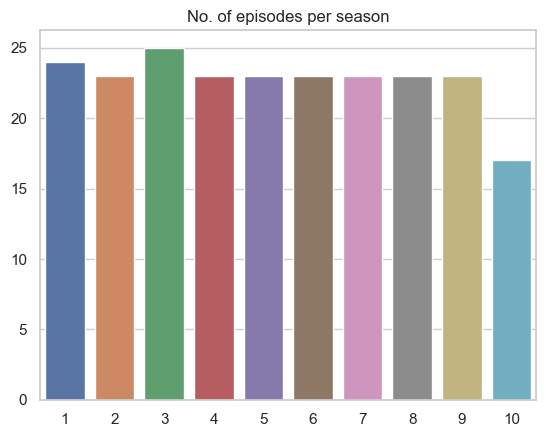

In [559]:
season_episode_count = friends_df['Season'].value_counts().sort_index()

sns.barplot(x=season_episode_count.index, y=season_episode_count.values).set(title='No. of episodes per season')
plt.show()


## Q2: Which among the characters has the most exposure?
Exposure means that the character is mentioned on the episode's summary

### Create new dataframe: character_exposure

In [560]:
characters = ['Monica', 'Rachel', 'Phoebe', 'Chandler', 'Ross', 'Joey']

def mentioned(row, character):
    if character in row['Summary']:
        return 1
    else:
        return 0

# Create a flag column for each characters if they are mentioned in an episode's summary
for character in characters:
    friends_df[character] = friends_df.apply(lambda row: mentioned(row, character), axis=1)

In [561]:
# Reshape dataframe to visualize exposure for each character
character_exposure = pd.melt(friends_df, id_vars=['Season', 'Episode', 'Rating', 'U.S. viewers (million)'], value_vars=characters, var_name='Character')
character_exposure = character_exposure[character_exposure['value'] == 1].iloc[:, :-1]


### Character exposure per season

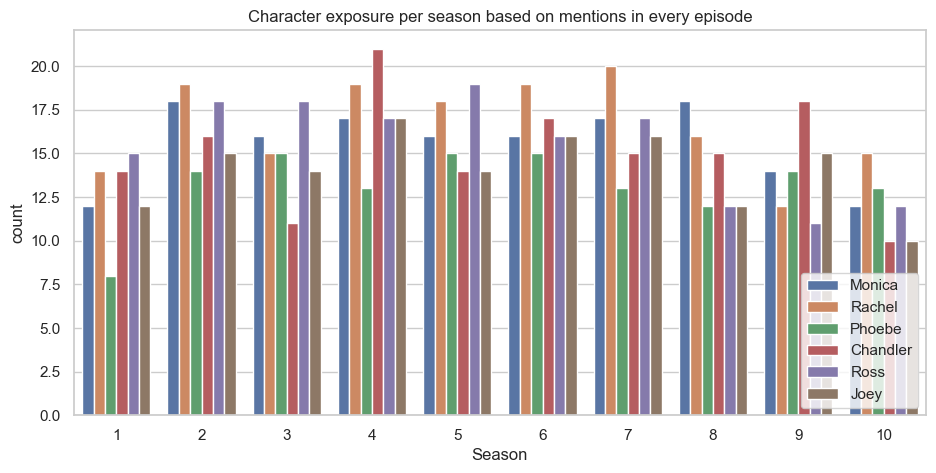

In [562]:
fig, ax = plt.subplots(figsize=(11, 5))

sns.countplot(ax=ax, x='Season', hue='Character', data=character_exposure).set(
    title='Character exposure per season based on mentions in every episode')
plt.legend(loc='lower right')
plt.show()


### Most mentioned character per season

In [563]:
character_exposure[['Season', 'Character', 'Episode']].groupby(['Season', 'Character'])\
    .count().sort_values(['Season', 'Episode'])\
        .groupby(level=0).tail(1)\
            .rename(columns={'Episode':'No. of episode mentions'})

,,No. of episode mentions
Season,Character,
1,Ross,15
2,Rachel,19
3,Ross,18
4,Chandler,21
5,Ross,19
6,Rachel,19
7,Rachel,20
8,Monica,18
9,Chandler,18


### Overall character exposure

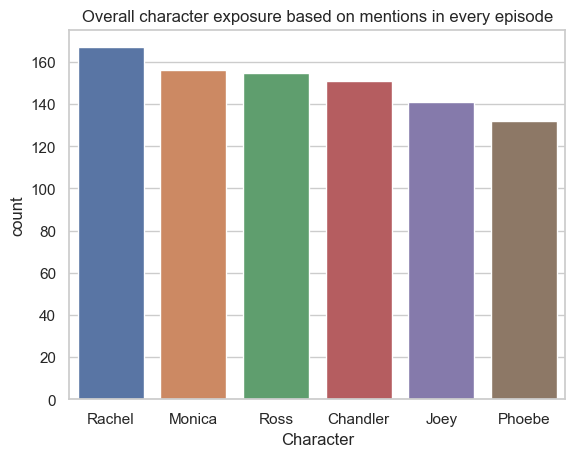

In [564]:
# Visualize exposure
sns.countplot(x='Character', data=character_exposure,
              order=character_exposure['Character'].value_counts().index).set(title='Overall character exposure based on mentions in every episode')
plt.show()

## Q3: Is the average viewer consistent per season?

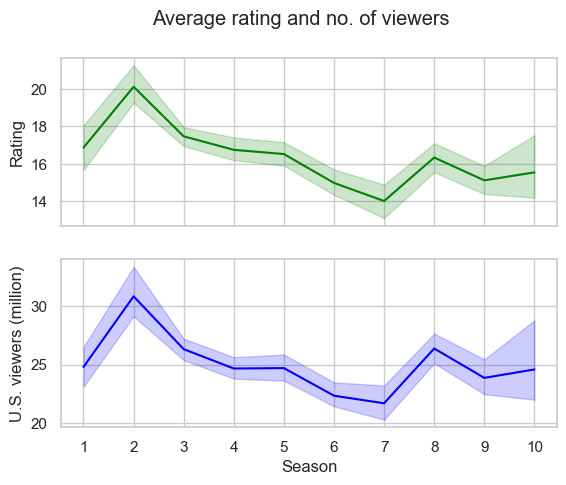

In [573]:
seasons = [i+1 for i in range(friends_df['Season'].max())]

fig, ax = plt.subplots(2, sharex=True)
fig.suptitle('Average rating and no. of viewers')
sns.lineplot(ax=ax[0], x='Season', y='Rating', data=friends_df, color='green')
sns.lineplot(ax=ax[1], x='Season', y='U.S. viewers (million)',
             data=friends_df, color='blue')
ax[1].set_xticks(seasons)
plt.show()

## Q4: Which season has the most episodes?

In [587]:
# Create new dataframe for season ratings
season_ratings = friends_df\
    .groupby('Season')\
    .aggregate(
        {
            'Rating': ['mean'],
            'U.S. viewers (million)': ['mean'],
            'Season': ['count'],
        }
    ).rename(columns={'Season': 'Episodes'}, level=0)

season_ratings[season_ratings[('Episodes', 'count')] == season_ratings[(
    'Episodes', 'count')].max()]['Episodes']


,count
Season,
3,25


## Q4: Most rated and least rated season

### Most rated season

In [567]:
season_ratings[season_ratings[('Rating', 'mean')] == season_ratings[('Rating', 'mean')].max()]

,Rating,U.S. viewers (million),Episodes
,mean,mean,count
Season,,,
2,20.117391,30.8,23


### Least rated season

In [568]:
season_ratings[season_ratings[('Rating', 'mean')] == season_ratings[('Rating', 'mean')].min()]


,Rating,U.S. viewers (million),Episodes
,mean,mean,count
Season,,,
7,14.013043,21.703478,23


## Q5: Most rated and least rated episodes

### Least rated episode

In [569]:
friends_df[friends_df['Rating'] == friends_df['Rating'].min()][['Season', 'Episode', 'Title', 'Rating', 'U.S. viewers (million)']]

,Season,Episode,Title,Rating,U.S. viewers (million)
148,7,8,The One Where Chandler Doesn't Like Dogs,9.6,16.57


### Most rated episode

In [570]:
friends_df[friends_df['Rating'] == friends_df['Rating'].max()][['Season', 'Episode', 'Title', 'Rating', 'U.S. viewers (million)']]


,Season,Episode,Title,Rating,U.S. viewers (million)
228,10,17,The Last One,29.8,52.46
